In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Plotting figures of Sec. V.A.2 ($X=2$ Teukolsky wave) in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter
import sys

pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 1.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

# Plotting waveform quantities at future null infinity

Reproducing Figs. 6, 15, and 16 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [3]:
def loaddata(name,time):
    data = np.loadtxt(name+'.dat')
    data_interp = interp1d(data[:,0], data[:,1])(time)
    return data_interp

def get_plot_range(name):
    if name=='News':
        title_name = '$N_{20}$'
        ymin = 1e-6
        ymax = 2e1
    elif name=='Strain':
        title_name = '$h_{l=2,m=0}$'
        ymin = 1e-4
        ymax = 1e1
    elif name=='Psi4':
        title_name = '$\psi_{4}^{(l=2,m=0)}$'
        ymin = 1e-6
        ymax = 10
    elif name=='Psi3':
        title_name = '$\psi_{3}^{(l=2,m=0)}$'
        ymin = 1e-6
        ymax = 1e1
    elif name=='Psi2':
        title_name = '$\psi_{2}^{(l=2,m=0)}$'
        ymin = 1e-4
        ymax = 8e0
    elif name=='Psi1':
        title_name = '$\psi_{1}^{(l=2,m=0)}$'
        ymin = 1e-4
        ymax = 1e2
    elif name=='Psi0':
        title_name = '$\psi_{0}^{(l=2,m=0)}$'
        ymin = 1e-2
        ymax = 1e4
        
    return title_name, ymin, ymax

## Strain

In [4]:
name = 'Strain'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

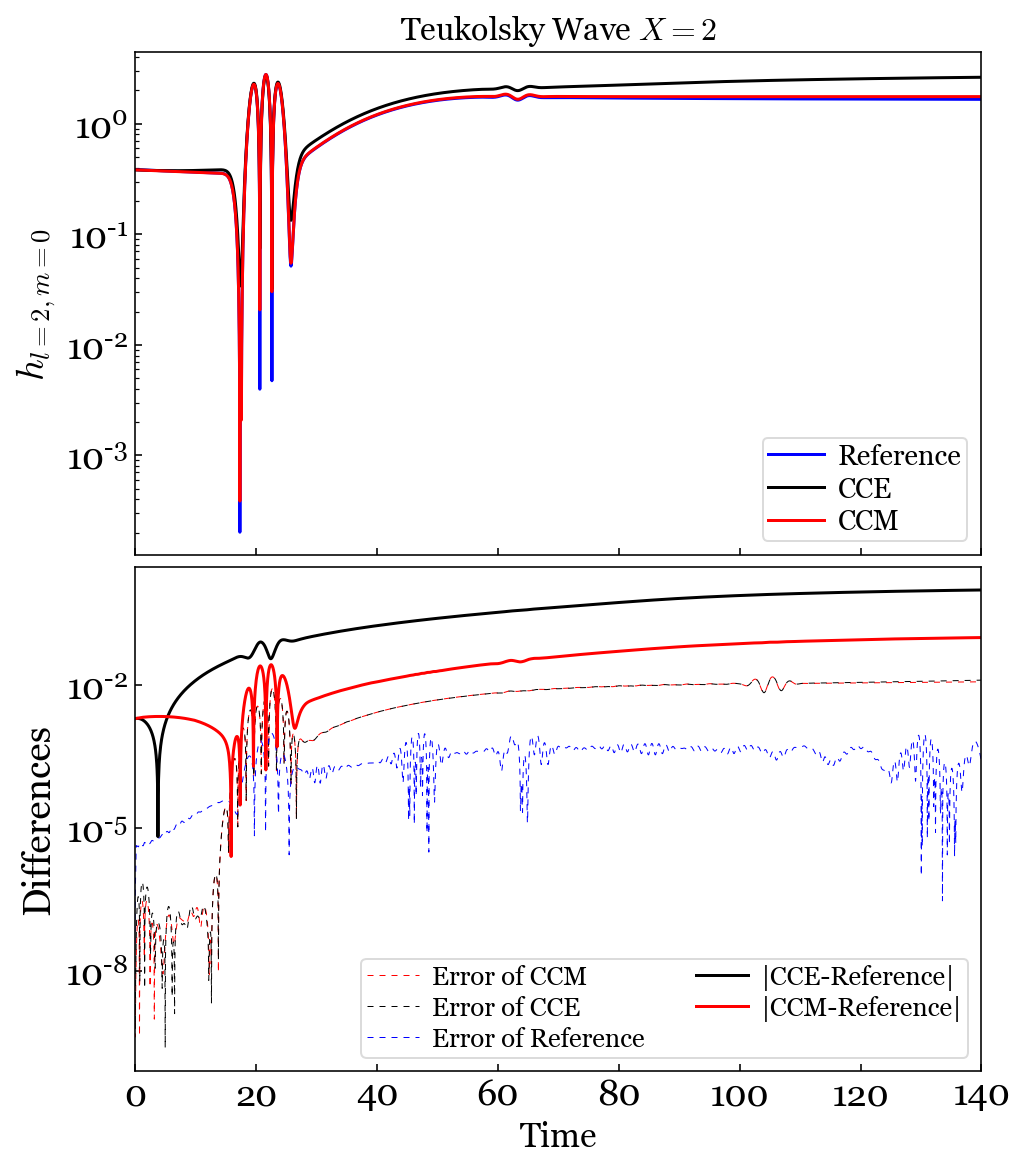

In [5]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## News

In [6]:
name = 'News'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

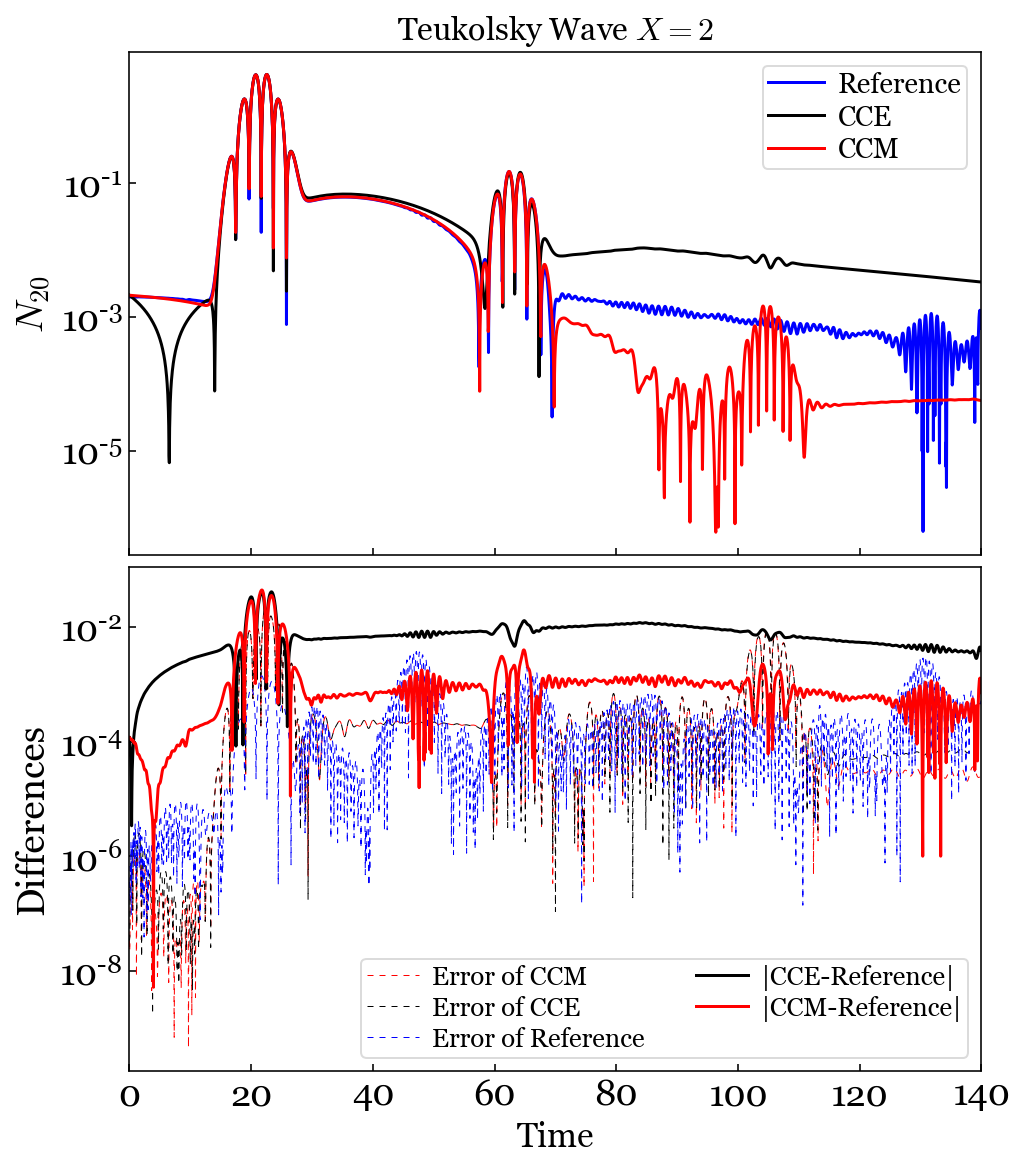

In [7]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## $\psi_0$

In [8]:
name = 'Psi0'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

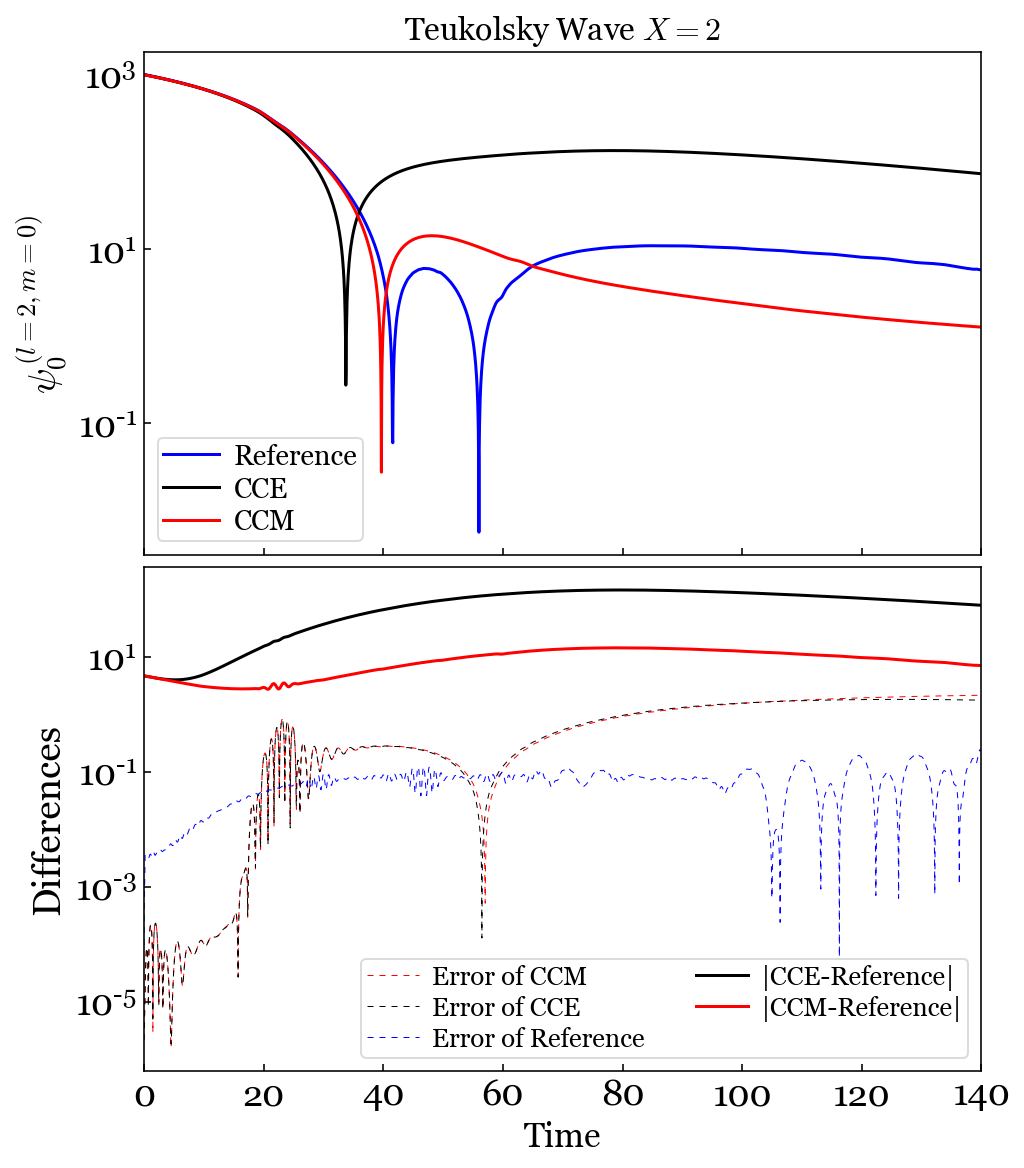

In [9]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## $\psi_1$

In [10]:
name = 'Psi1'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

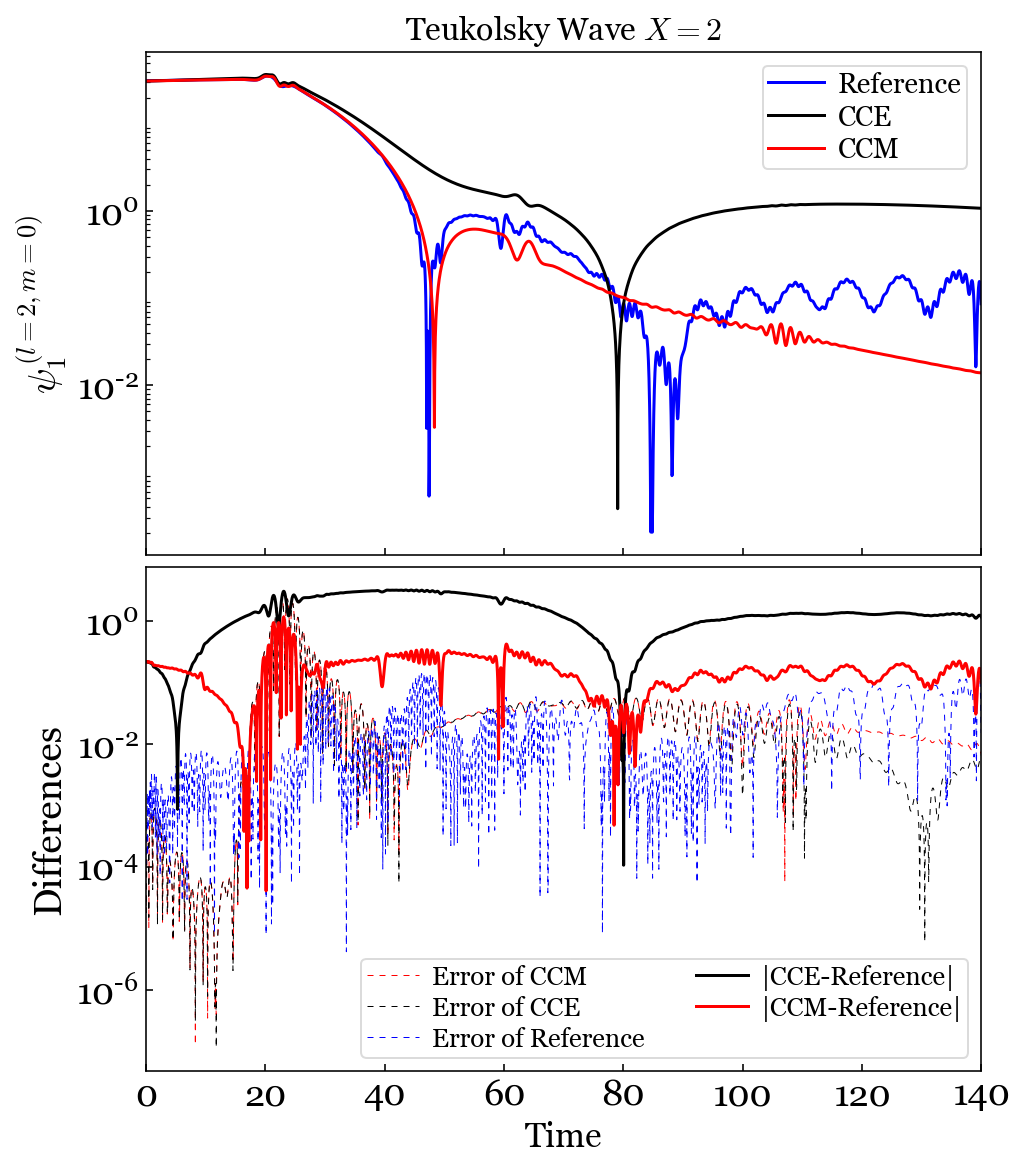

In [11]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## $\psi_2$

In [12]:
name = 'Psi2'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

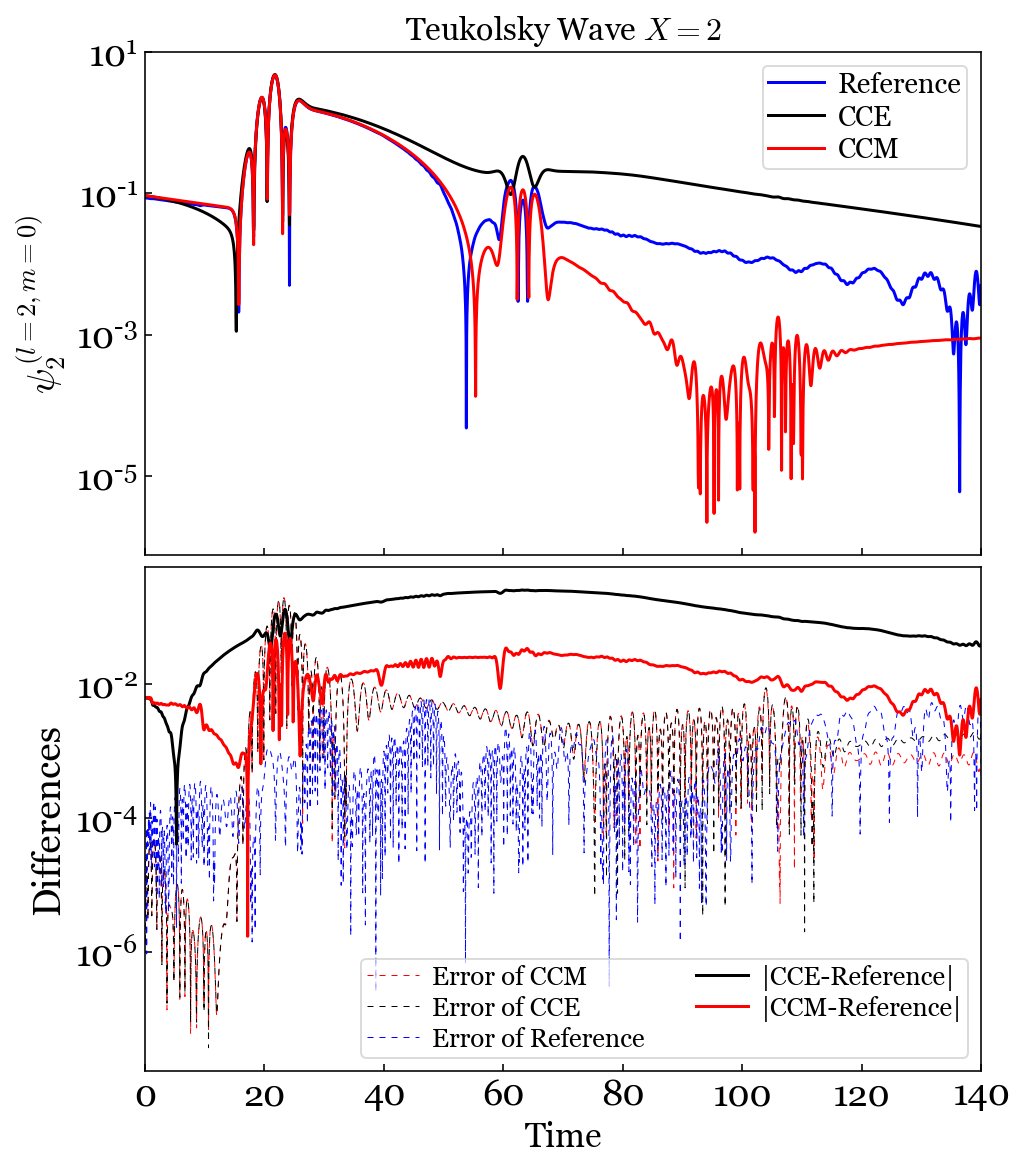

In [13]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## $\psi_3$

In [14]:
name = 'Psi3'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

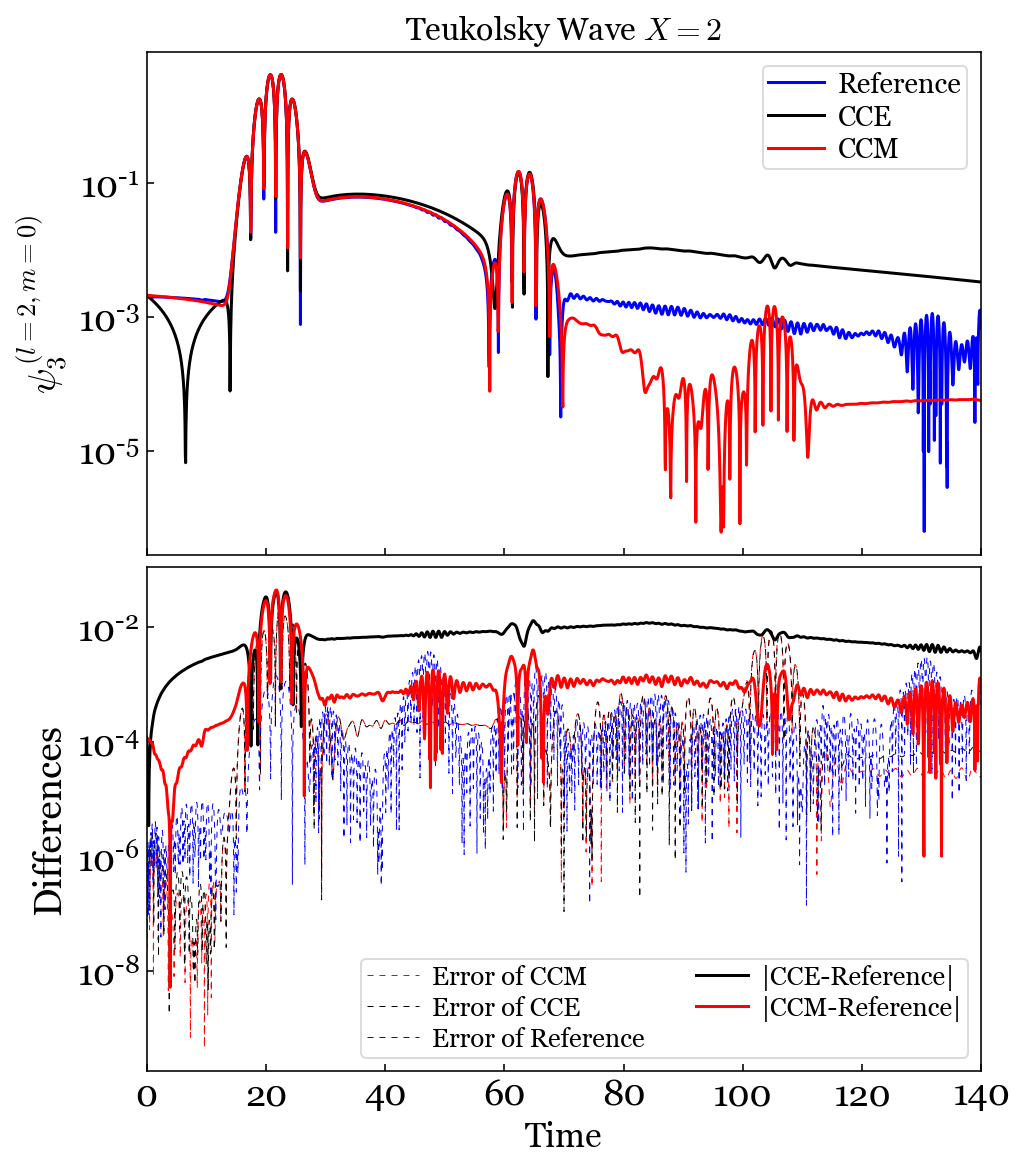

In [15]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

## $\psi_4$

In [16]:
name = 'Psi4'
maxtime = 140
time = np.arange(0, maxtime,0.05)

cce366_int = loaddata('366cce/'+name, time)
cce377_int = loaddata('377cce/'+name, time)

ccm366_int = loaddata('366ccm/'+name, time)
ccm377_int = loaddata('377ccm/'+name, time)

ref_lev5 = loaddata('reference/lev5/'+name, time)
ref_lev6 = loaddata('reference/lev6/'+name, time)

title_name, ymin, ymax = get_plot_range(name)

Text(0.5, 0, 'Time')

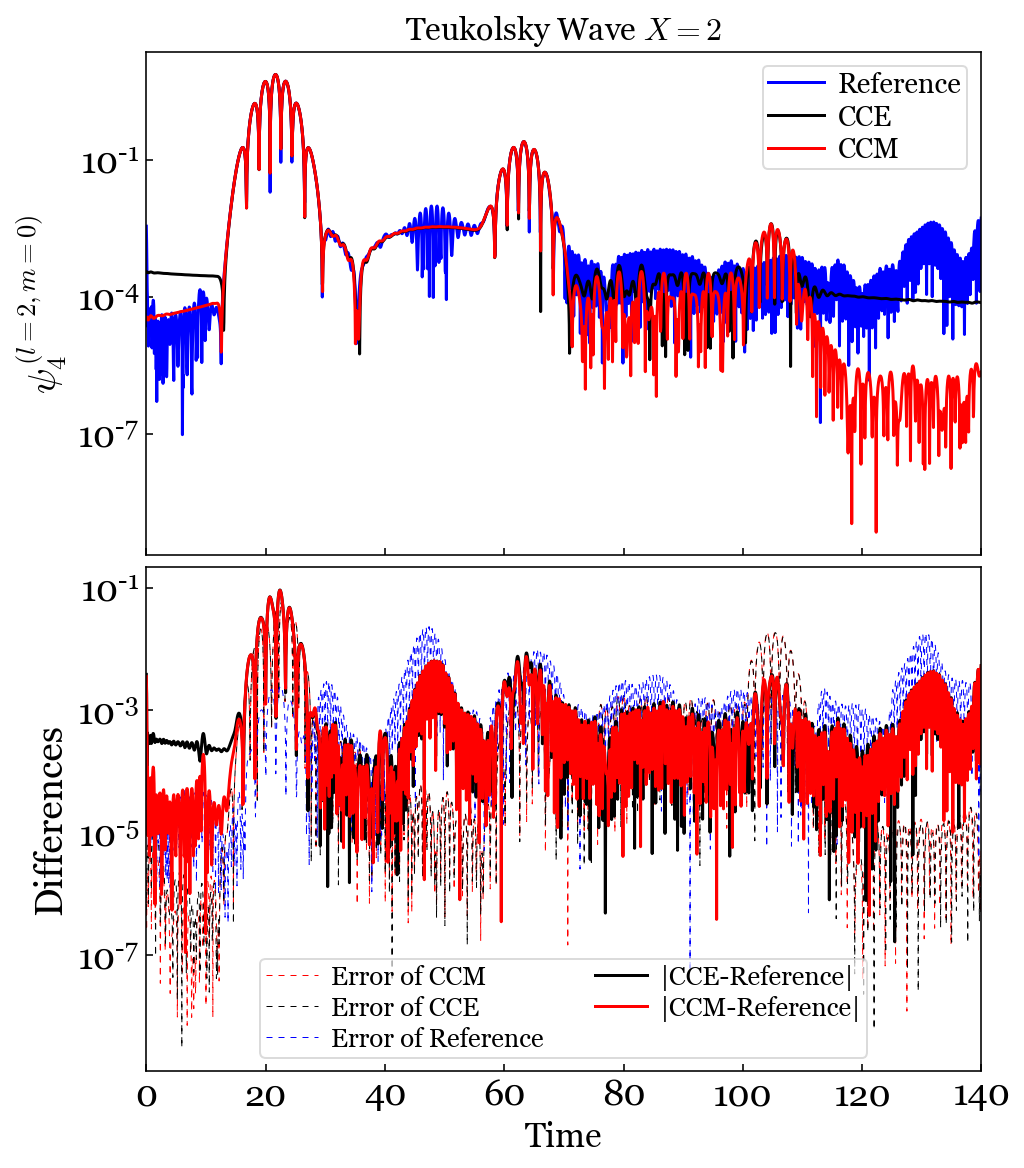

In [17]:
fig,ax=pl.subplots(2, 1, figsize=(7,8), sharex=True, constrained_layout=True)
ax[0].semilogy(time, abs(ref_lev6), label='Reference', color='b', lw=1.5)
ax[0].semilogy(time, abs(cce377_int), label='CCE', color='k', lw=1.5)
ax[0].semilogy(time, abs(ccm377_int), label='CCM', color='r', lw=1.5)
ax[0].legend(fontsize=14)
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=16)
ax[0].set_ylabel(title_name, fontsize=19)

ax[1].semilogy(time, abs(ccm377_int-ccm366_int),\
               label='Error of CCM', ls='--', color='r',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce366_int-cce377_int),\
               label='Error of CCE', ls='--',color='k',lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(ref_lev6-ref_lev5), label='Error of Reference',\
               ls='--', color='b', lw=0.5, dashes=(6, 6))
ax[1].semilogy(time, abs(cce377_int-ref_lev6),\
               label='|CCE-Reference|', color='k', lw=1.5)
ax[1].semilogy(time, abs(ccm377_int-ref_lev6),\
               label='|CCM-Reference|', color='r', lw=1.5)
ax[1].legend(ncol=2,loc='best', fontsize=13)
ax[1].set_ylabel('Differences', fontsize=19)
ax[1].set_xlim(0, maxtime)

ax[0].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[0].yaxis.set_tick_params(labelsize=18)
ax[1].yaxis.set_major_locator(LogLocator(10,numticks=5))
ax[1].yaxis.set_tick_params(labelsize=18)
ax[1].xaxis.set_tick_params(labelsize=18)
ax[1].set_xlabel('Time', fontsize=17)

# GH constraints

Reproducing Fig. 5 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [18]:
constrain333ccm = np.loadtxt('333ccm/Norms.dat')
constrain355ccm = np.loadtxt('355ccm/Norms.dat')
constrain377ccm = np.loadtxt('377ccm/Norms.dat')

/var/folders/20/8zqp3zsn0zz37jw30nm46pnh0000gn/T/ipykernel_87711/3904097285.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  pl.subplots_adjust(hspace=0.02)


(0.0, 150.0)

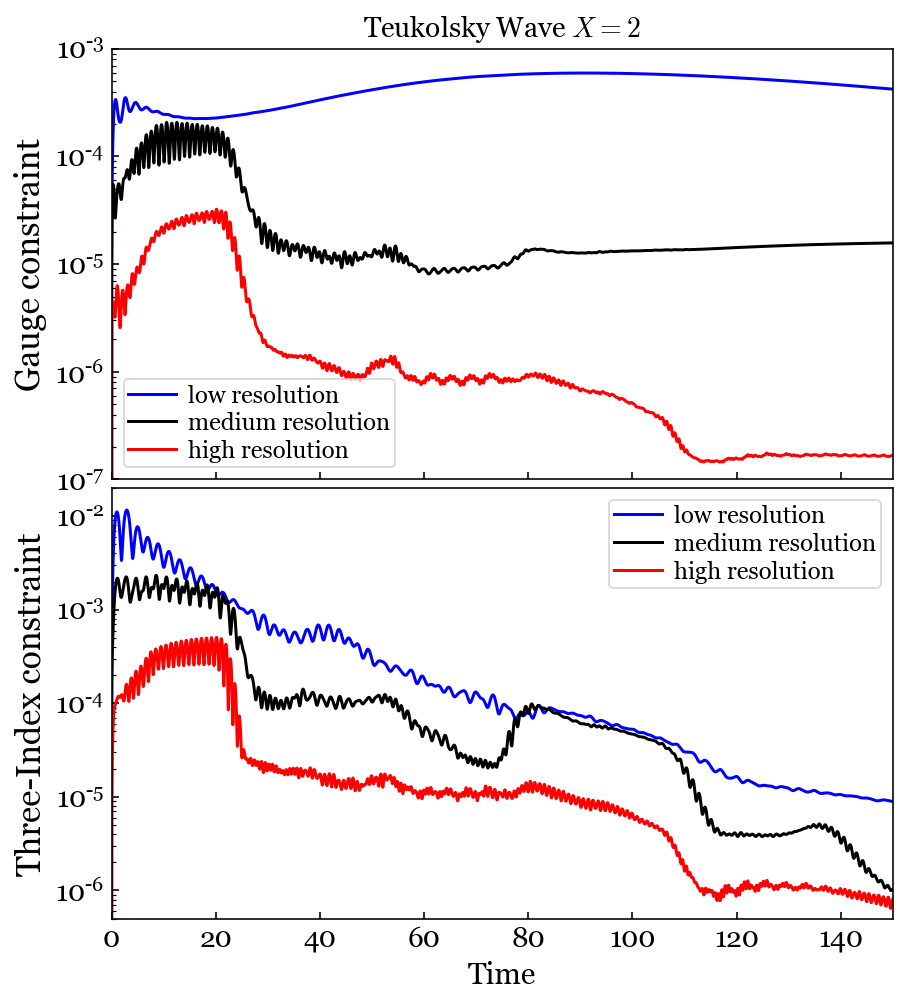

In [19]:
fig, ax=pl.subplots(2,1,figsize=(7,8),\
                    constrained_layout=True, sharex=True)
pl.subplots_adjust(hspace=0.02)

indd=3
ax[0].semilogy(constrain333ccm[:,0], constrain333ccm[:,indd],\
               'b',label='low resolution')
ax[0].semilogy(constrain355ccm[:,0], constrain355ccm[:,indd],\
               'k',label='medium resolution')
ax[0].semilogy(constrain377ccm[:,0], constrain377ccm[:,indd],\
               'r',label='high resolution')
ax[0].set_title(r'Teukolsky Wave $X=2$', fontsize=14)
ax[0].set_ylabel('Gauge constraint')
ax[0].set_ylim(1e-7, 1e-3)
ax[0].legend()

indd=4
ax[1].semilogy(constrain333ccm[:,0], constrain333ccm[:,indd],\
               'b',label='low resolution')
ax[1].semilogy(constrain355ccm[:,0], constrain355ccm[:,indd],\
               'k',label='medium resolution')
ax[1].semilogy(constrain377ccm[:,0], constrain377ccm[:,indd],\
               'r',label='high resolution')
ax[1].set_ylabel('Three-Index constraint')
ax[1].set_ylim(5e-7, 2e-2)
ax[1].legend()
ax[1].set_xlabel('Time', fontsize=15)
ax[1].set_xlim(0, 150)


# Bianchi identities

Reproducing Fig. 7 in arXiv: [2308.10361](https://arxiv.org/pdf/2308.10361)

In [20]:
vio377ccm = np.loadtxt('377ccm/violation.dat')
vio377cce = np.loadtxt('377cce/violation.dat')
vioref = np.loadtxt('reference/lev6/violation.dat')

## $\dot{\psi}_0$

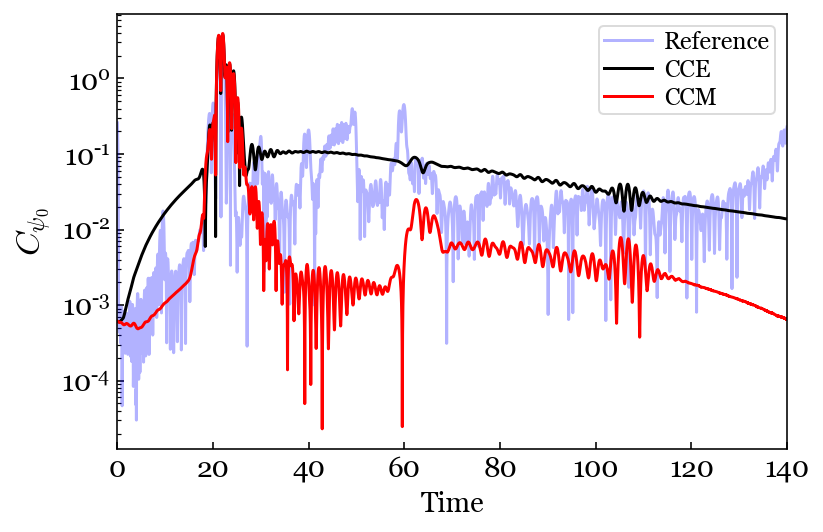

In [21]:
indd=1
pl.semilogy(vioref[:,0], vioref[:,indd], 'b',\
            label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0],vio377cce[:,indd],\
            'k',label='CCE')
pl.semilogy(vio377ccm[:,0],vio377ccm[:,indd],\
            'r',label='CCM')
pl.xlabel('Time',fontsize=14)
pl.ylabel(r'$C_{\psi_0}$')
pl.xlim(0, maxtime)
pl.legend()

## $\dot{\psi}_1$

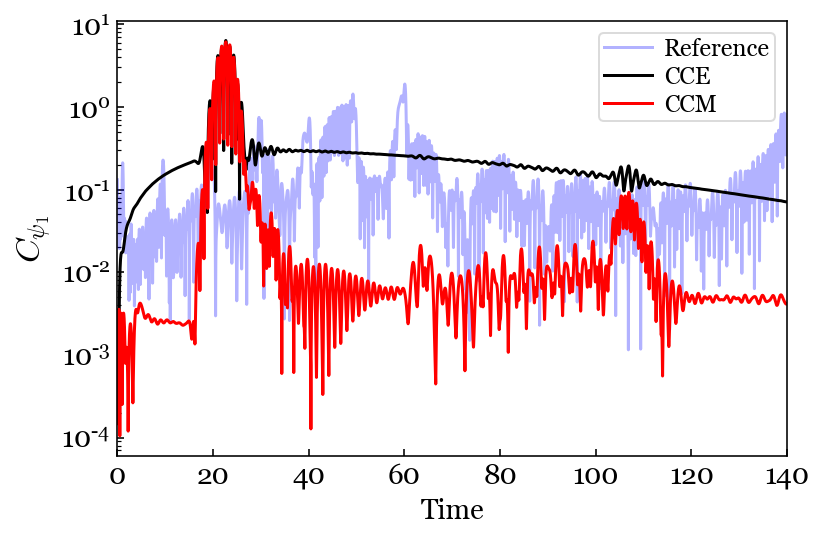

In [22]:
indd=2

pl.semilogy(vioref[:,0], vioref[:,indd],\
            'b', label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0],vio377cce[:,indd],\
            'k', label='CCE')
pl.semilogy(vio377ccm[:,0],vio377ccm[:,indd],\
            'r', label='CCM')
pl.xlabel('Time', fontsize=14)
pl.ylabel(r'$C_{\psi_1}$')
pl.xlim(0, maxtime)
pl.legend()

## $\dot{\psi}_2$

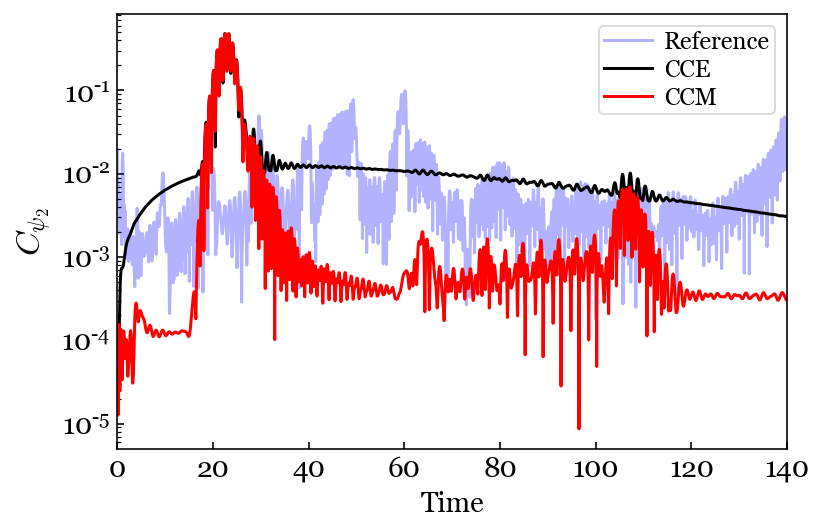

In [23]:
indd=3

pl.semilogy(vioref[:,0], vioref[:,indd],\
            'b', label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0],vio377cce[:,indd],\
            'k', label='CCE')
pl.semilogy(vio377ccm[:,0],vio377ccm[:,indd],\
            'r', label='CCM')
pl.xlabel('Time', fontsize=14)
pl.ylabel(r'$C_{\psi_2}$')
pl.xlim(0, maxtime)
pl.legend()

## $\dot{\psi}_3$

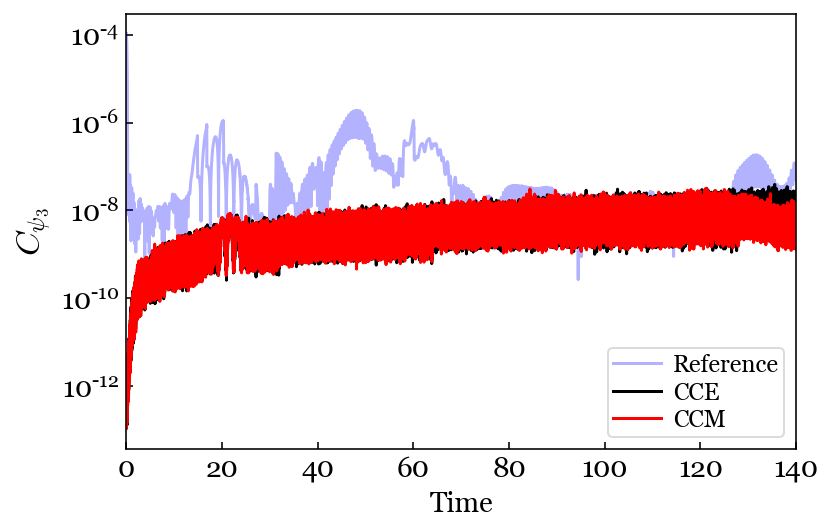

In [24]:
indd=4

pl.semilogy(vioref[:,0], vioref[:,indd],\
            'b', label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0], vio377cce[:,indd],\
            'k', label='CCE')
pl.semilogy(vio377ccm[:,0],vio377ccm[:,indd],\
            'r', label='CCM')
pl.xlabel('Time', fontsize=14)
pl.ylabel(r'$C_{\psi_3}$')
pl.xlim(0, maxtime)
pl.legend(loc='lower right')

## $\dot{\psi}_4$

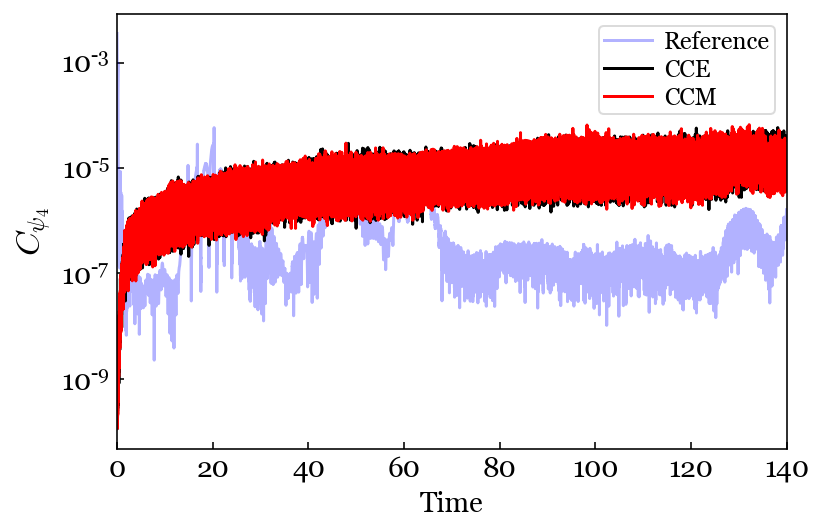

In [25]:
indd=5

pl.semilogy(vioref[:,0], vioref[:,indd],\
            'b', label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0], vio377cce[:,indd],\
            'k', label='CCE')
pl.semilogy(vio377ccm[:,0],vio377ccm[:,indd],\
            'r', label='CCM')
pl.xlabel('Time', fontsize=14)
pl.ylabel(r'$C_{\psi_4}$')
pl.xlim(0, maxtime)
pl.legend()

## Im $\psi_2$

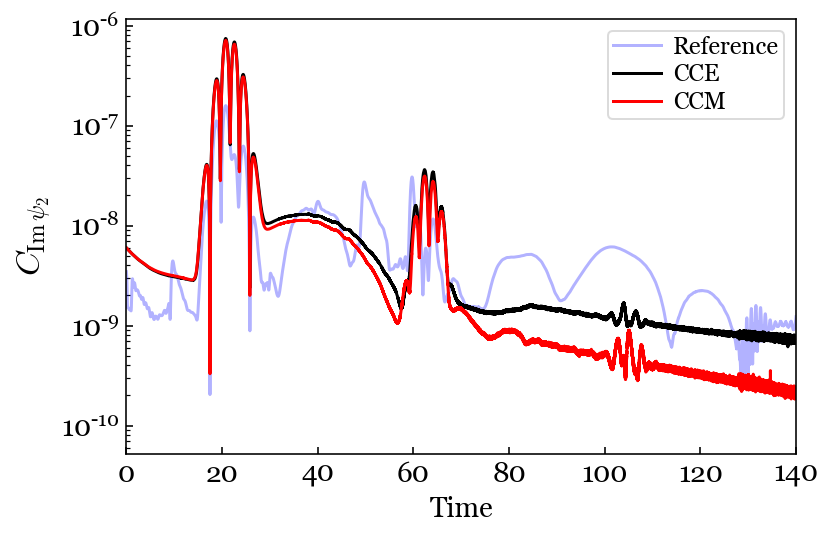

In [26]:
indd=6

pl.semilogy(vioref[:,0], vioref[:,indd],\
            'b', label='Reference', alpha=0.3)
pl.semilogy(vio377cce[:,0], vio377cce[:,indd],\
            'k', label='CCE')
pl.semilogy(vio377ccm[:,0], vio377ccm[:,indd],\
            'r', label='CCM')
pl.xlabel('Time', fontsize=14)
pl.ylabel(r'$C_{{\rm Im}\,\psi_2}$')
pl.xlim(0, maxtime)
pl.legend()